## Importing all the dependencies

In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Reading file

In [2]:
car_Initial = pd.read_csv('hw_data_set_1.csv')

In [3]:
car_Initial.head()

,sales_week,sales_date,transaction_id,year,make,model_id,model,drive_type,door,transmission,...,customercash,finance,lease,cash,trim,trim_id,make_id,longitude,latitude,price
0,24APR2010,24APR2010,608918958,2010,Honda,63381,Fit,FWD,4,Automatic,...,0,0,1,0,5dr HB Auto Sport,1654428,1620,-74.315748,41.182254,18959.264305
1,02JAN2010,02JAN2010,260621396,2009,Toyota,56865,Corolla,FWD,4,Automatic,...,750,0,1,0,4dr Sdn Auto S (Natl),1546648,1644,-97.876902,30.170527,22336.774183
2,27FEB2010,27FEB2010,424551281,2010,Hyundai,60726,Sonata,FWD,4,Automatic,...,0,0,1,0,4dr Sdn 2.4L Auto GLS,1664683,1557,-115.315133,36.308840,21213.933956
3,16JAN2010,16JAN2010,289620930,2010,Honda,62856,Odyssey,FWD,4,Automatic,...,0,1,0,0,5dr Touring Elite,1650403,1620,-82.099054,26.991101,44018.166912
4,28NOV2009,28NOV2009,120457404,2010,Honda,62856,Odyssey,FWD,4,Automatic,...,0,1,0,0,5dr EX-L w/Navi,1650388,1620,-80.341466,25.890138,36003.185030


## Checing for the null value in data.
Data does not have null values.

In [4]:
missing_values = car_Initial.isnull().sum()
missing_values

sales_week          0
sales_date          0
transaction_id      0
year                0
make                0
model_id            0
model               0
drive_type          0
door                0
transmission        0
base_msrp           0
engine              0
transaction_msrp    0
destination         0
bodytype            0
zip                 0
State               0
dealercash          0
customercash        0
finance             0
lease               0
cash                0
trim                0
trim_id             0
make_id             0
longitude           0
latitude            0
price               0
dtype: int64

## Describing the data
Looking at the descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.

There are few columns which has a big difference between the 3rd quartile and max value:
1. base_msrp
2. transaction_msrp
3. dealer cash
4. customer cash
5. price.

In [5]:
car_Initial.describe()

,transaction_id,year,model_id,door,base_msrp,transaction_msrp,destination,zip,dealercash,customercash,finance,lease,cash,trim_id,make_id,longitude,latitude,price
count,1.240280e+05,124028.000000,124028.000000,124028.000000,124028.000000,124028.000000,124028.000000,124028.000000,124028.000000,124028.000000,124028.000000,124028.000000,124028.000000,1.240280e+05,124028.000000,124028.000000,124028.000000,1.240280e+05
mean,3.332122e+08,2009.589851,60280.273309,3.773664,31255.600840,33118.456042,857.498750,51925.586327,83.141307,1650.226812,0.594172,0.307302,0.098526,1.613757e+06,1809.781888,-91.635912,36.852659,3.204657e+04
std,1.873188e+08,0.507355,2098.020435,0.632911,10856.472231,11027.034865,97.655178,30480.272364,294.679121,19561.822678,0.491053,0.461377,0.298026,3.276029e+04,200.671197,16.001274,5.199850,2.015295e+04
min,8.354466e+06,2009.000000,56583.000000,2.000000,9985.000000,10735.000000,630.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.541808e+06,1250.000000,-166.288621,19.061249,1.038186e+04
25%,1.714970e+08,2009.000000,58029.000000,4.000000,22430.000000,23945.000000,760.000000,23175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.584478e+06,1644.000000,-98.391367,33.167006,2.312755e+04
50%,3.327859e+08,2010.000000,60726.000000,4.000000,30445.000000,32622.500000,820.000000,54984.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.620278e+06,1832.000000,-87.948130,37.780793,3.135983e+04
75%,4.960122e+08,2010.000000,62211.000000,4.000000,39075.000000,40890.000000,975.000000,78228.000000,0.000000,1500.000000,1.000000,1.000000,0.000000,1.645848e+06,1924.000000,-78.440172,40.858261,3.926194e+04
max,6.573538e+08,2025.000000,63939.000000,4.000000,113200.000000,117875.000000,995.000000,99841.000000,4000.000000,867300.000000,1.000000,1.000000,1.000000,1.674198e+06,2995.000000,-67.107224,70.472212,3.000000e+06


Lets look at the correlation between columns for more understanding
## Looking at the pairwise correlation of columns

In [6]:
car_Initial.corr()

,transaction_id,year,model_id,door,base_msrp,transaction_msrp,destination,zip,dealercash,customercash,finance,lease,cash,trim_id,make_id,longitude,latitude,price
transaction_id,1.000000,0.442962,0.420876,0.006441,-0.126299,-0.126082,-0.191206,0.000381,0.057141,-0.018374,-0.006595,0.006261,0.001173,0.391696,-0.117622,-0.000587,-0.003188,-0.066558
year,0.442962,1.000000,0.894560,0.026799,-0.099740,-0.100703,-0.354344,-0.001212,-0.228872,-0.032706,-0.001859,0.004320,-0.003625,0.862053,-0.104110,0.001767,-0.000070,-0.052855
model_id,0.420876,0.894560,1.000000,0.030431,-0.072964,-0.073942,-0.296804,-0.000036,-0.331137,-0.030615,-0.001274,0.004196,-0.004398,0.963839,-0.115897,-0.000189,0.000737,-0.041382
door,0.006441,0.026799,0.030431,1.000000,0.079944,0.077432,-0.140937,-0.001155,0.091806,0.002924,-0.002994,0.003771,-0.000905,0.015701,-0.086954,0.000258,0.003214,0.040127
base_msrp,-0.126299,-0.099740,-0.072964,0.079944,1.000000,0.991043,0.692084,0.002316,-0.328978,0.023445,-0.000037,0.000258,-0.000339,-0.030769,0.696409,-0.003817,-0.003140,0.515073
transaction_msrp,-0.126082,-0.100703,-0.073942,0.077432,0.991043,1.000000,0.690022,0.002726,-0.326207,0.022733,0.000123,0.000520,-0.001008,-0.031805,0.691916,-0.003887,-0.003583,0.520884
destination,-0.191206,-0.354344,-0.296804,-0.140937,0.692084,0.690022,1.000000,-0.002257,-0.269804,0.029382,0.000190,-0.001851,0.002553,-0.230802,0.627300,0.002091,-0.003199,0.360004
zip,0.000381,-0.001212,-0.000036,-0.001155,0.002316,0.002726,-0.002257,1.000000,-0.001196,-0.002984,0.002149,0.001528,-0.005907,-0.000578,0.001303,-0.940634,-0.309240,0.005290
dealercash,0.057141,-0.228872,-0.331137,0.091806,-0.328978,-0.326207,-0.269804,-0.001196,1.000000,0.000300,-0.000973,-0.000709,0.002700,-0.417837,-0.248756,0.002553,0.000122,-0.175899
customercash,-0.018374,-0.032706,-0.030615,0.002924,0.023445,0.022733,0.029382,-0.002984,0.000300,1.000000,-0.003219,0.002886,0.000837,-0.026896,0.021258,0.003141,-0.000646,0.011444


## Plotting the pairwise correlation of columns
Looking at the price histogram it is evident that data is skewed because of few outliers.


Lets analyze price in more detail

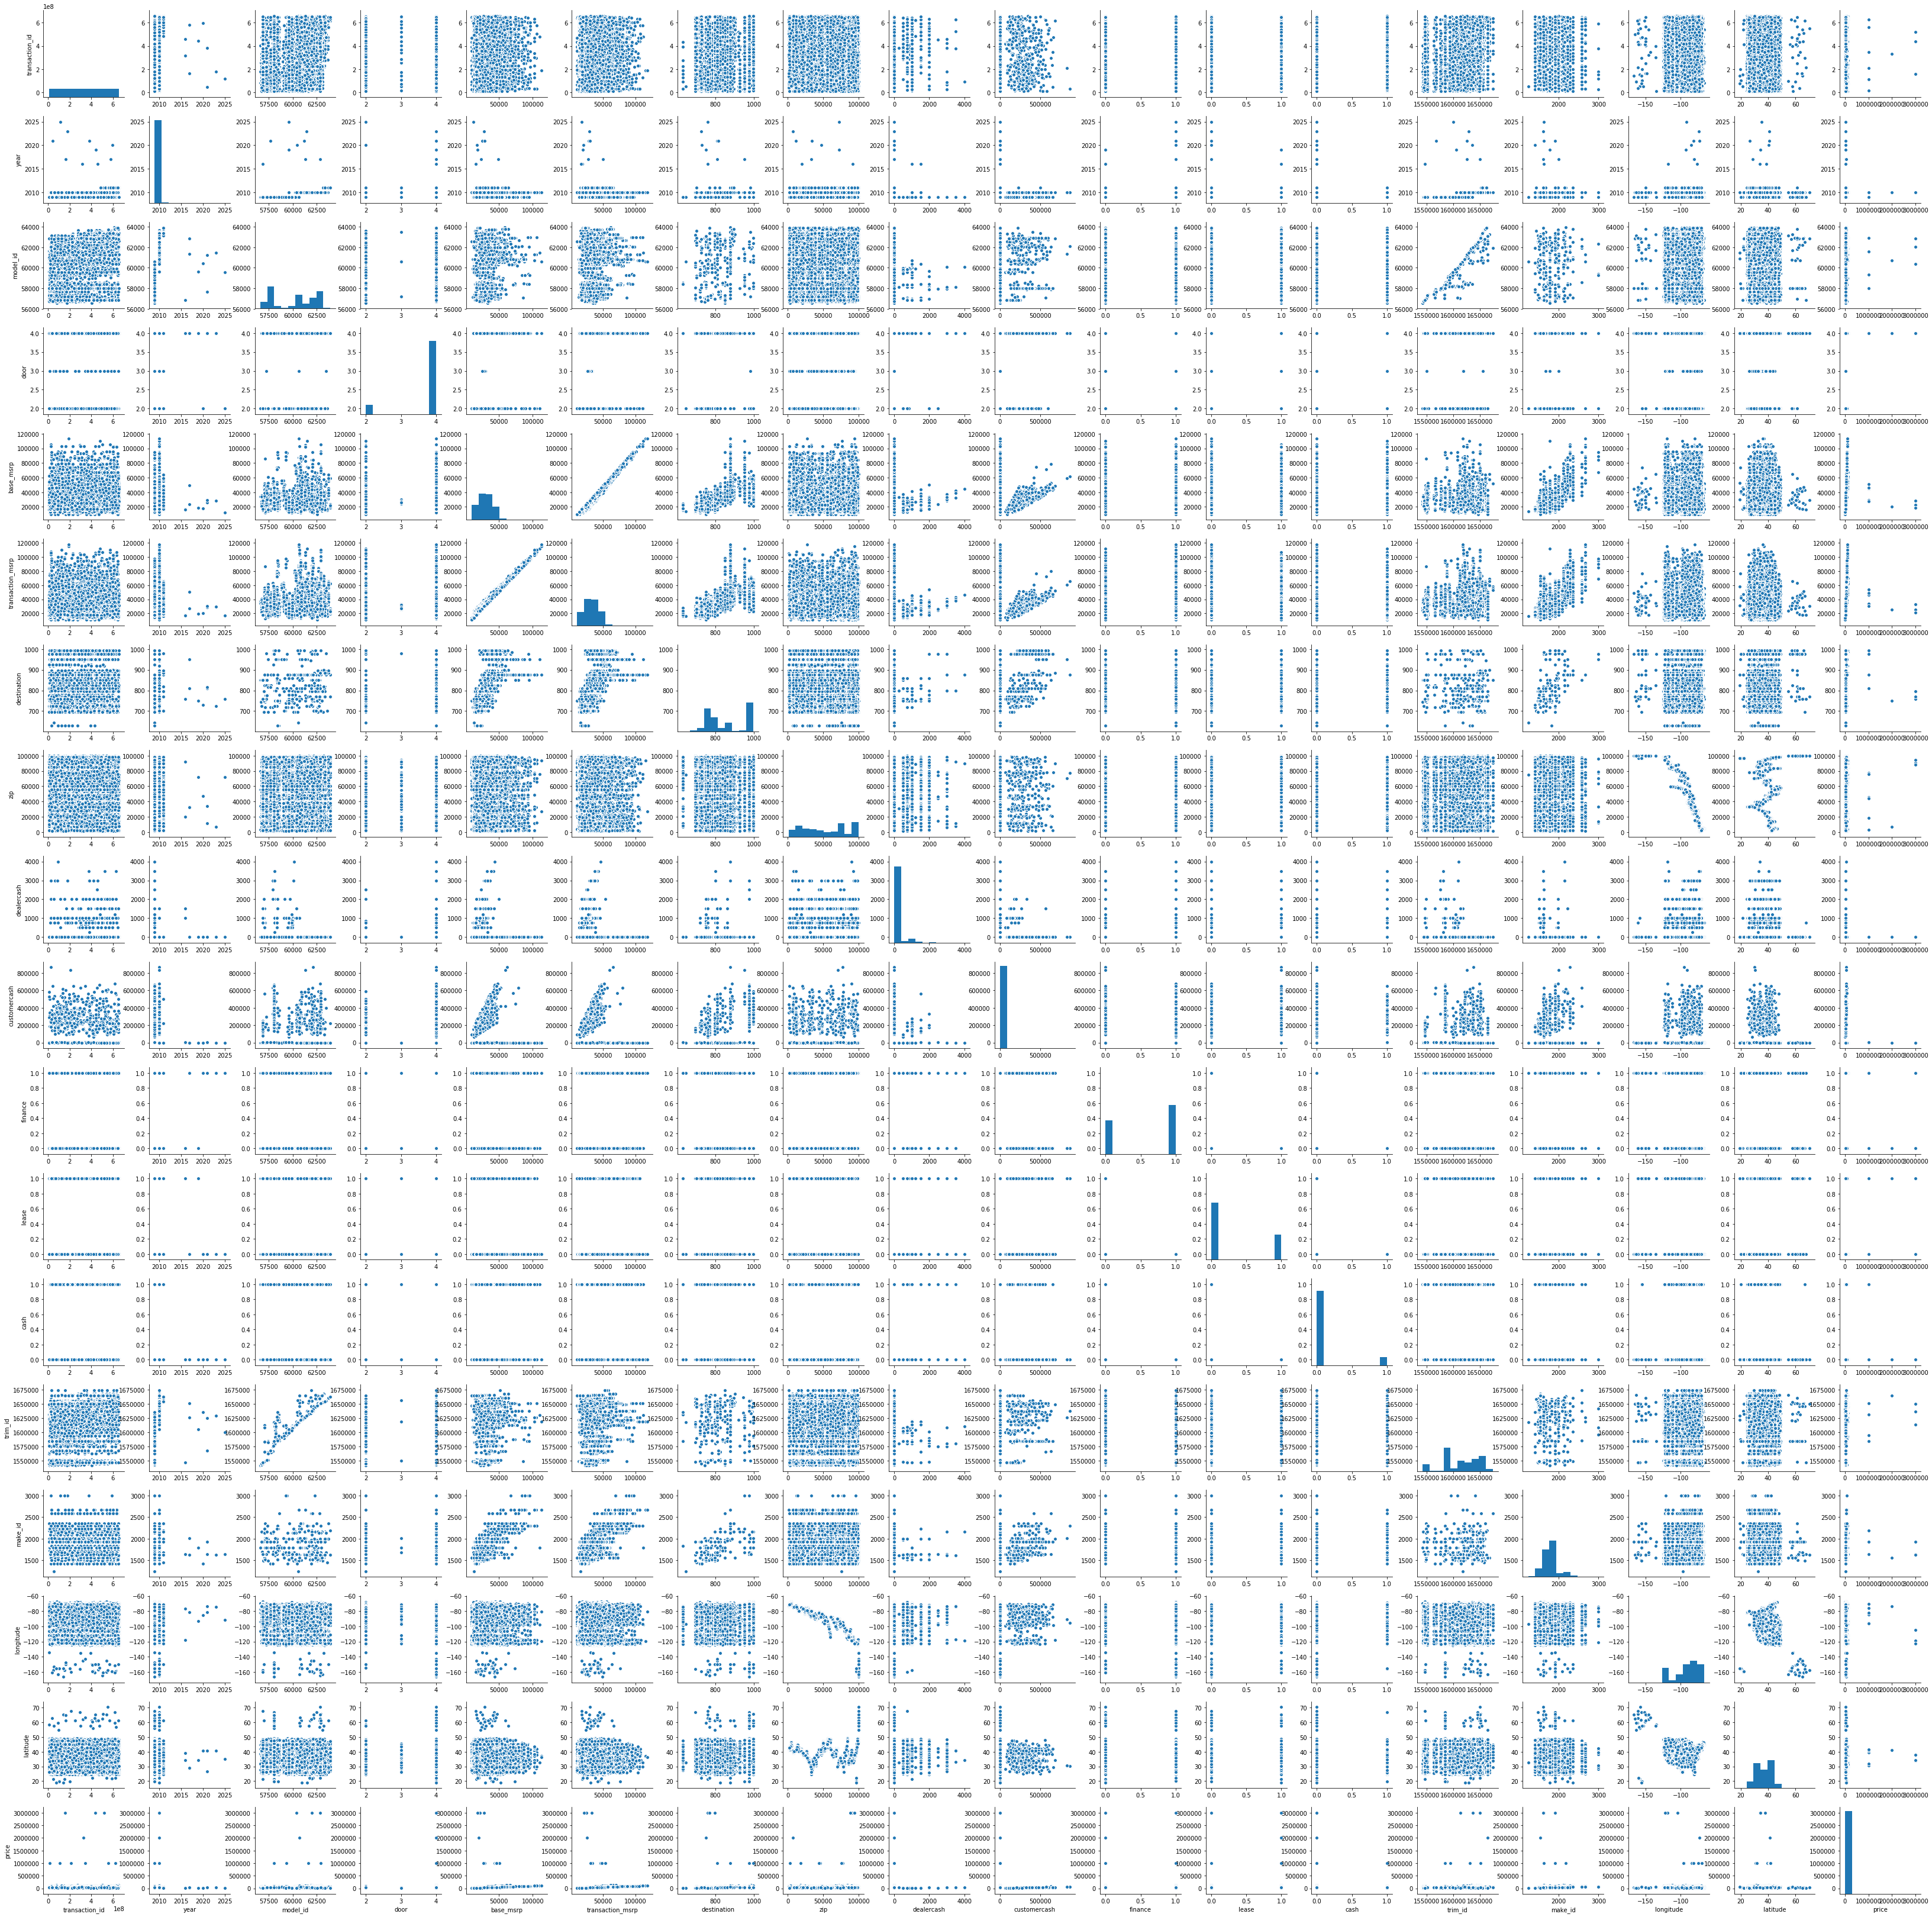

In [28]:
pair_plot = sns.pairplot(car_Initial)

In [29]:
pair_plot.savefig("output.png")

## Plotting a violin plot to get more information about the distribution of the price
Looking at the second violin plot it is evident that the outliers for price column are value above 70,000

Text(0.5,1,'After removing outliers')

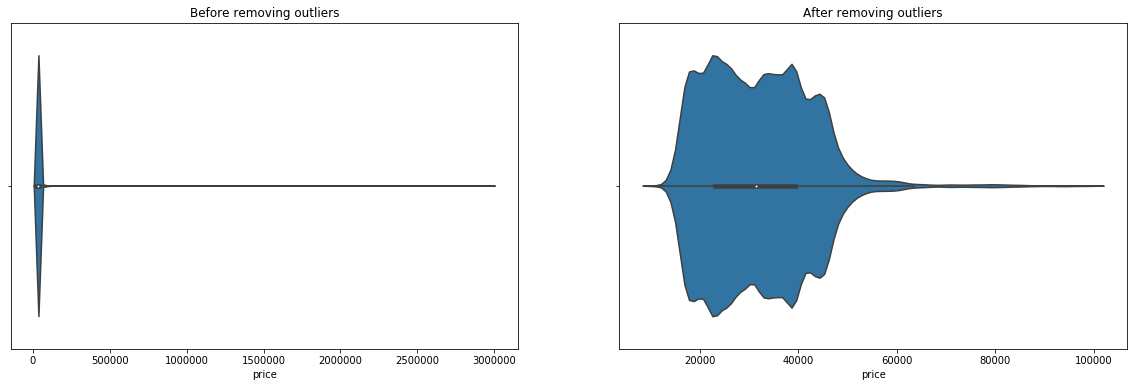

In [18]:
car_Modified = car_Initial[car_Initial.price <100000]
fig,ax = plt.subplots(1,2,figsize=(20,6))

sns.violinplot(x = car_Initial['price'], ax=ax[0])
ax[0].set_title('Before removing outliers')

sns.violinplot(x = car_Modified['price'],ax=ax[1])
ax[1].set_title('After removing outliers')

## Updating the car_Modified dataframe

In [19]:
car_Modified = car_Initial[car_Initial.price <70000]

### Price column learning:
It is evident from the violin plot that the price column data is skewed due to few high priced cars (outliers). Same applies to base_msrp and transaction_msrp.

First plot shows the histogram for price column from the car_Initial dataset (it is skewed)

Second plot shows the histogram for price column from the car_Modified dataset

Third plot shows the histogram for price column for the data where car price is greater than 70,000

Text(0,0.5,'Frequency')

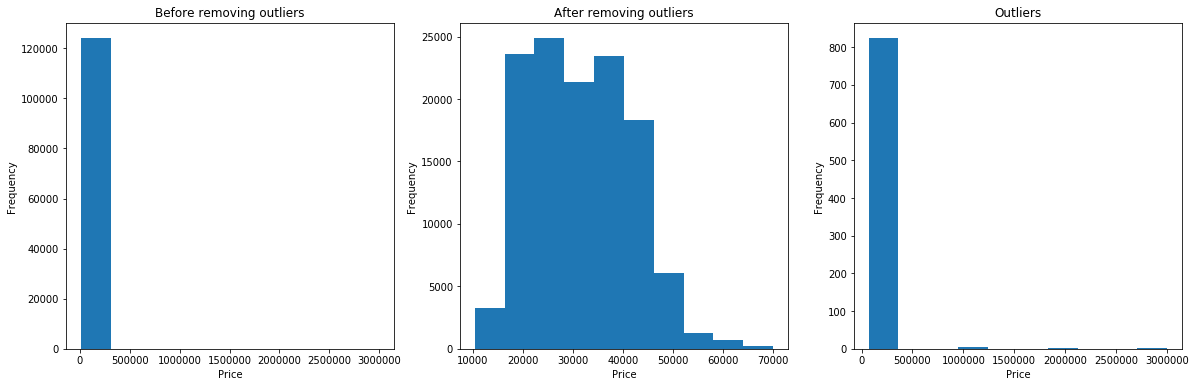

In [20]:
priceGreaterThan = car_Initial[car_Initial.price >=70000]
fig, ax = plt.subplots(1,3,figsize=(20,6))

car_Initial['price'].plot.hist(ax=ax[0])
ax[0].set_title('Before removing outliers')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')

car_Modified['price'].plot.hist(ax=ax[1])
ax[1].set_title('After removing outliers')
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Frequency')

priceGreaterThan['price'].plot.hist(ax=ax[2])
ax[2].set_title('Outliers')
ax[2].set_xlabel('Price')
ax[2].set_ylabel('Frequency')

Text(0.5,0,'Customer Cash')

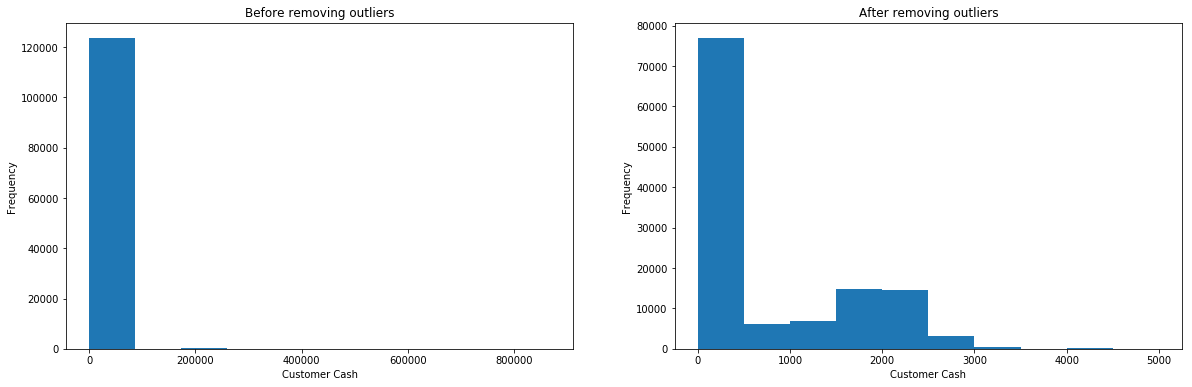

In [10]:
customerCashLow = car_Initial[car_Initial.customercash<25000]

fig,ax = plt.subplots(1,2,figsize=(20,6))

car_Initial['customercash'].plot.hist(ax = ax[0])
ax[0].set_title('Before removing outliers')
ax[0].set_xlabel('Customer Cash')

customerCashLow['customercash'].plot.hist(ax = ax[1])
ax[1].set_title('After removing outliers')
ax[1].set_xlabel('Customer Cash')

Text(0.5,1,'After removing outliers')

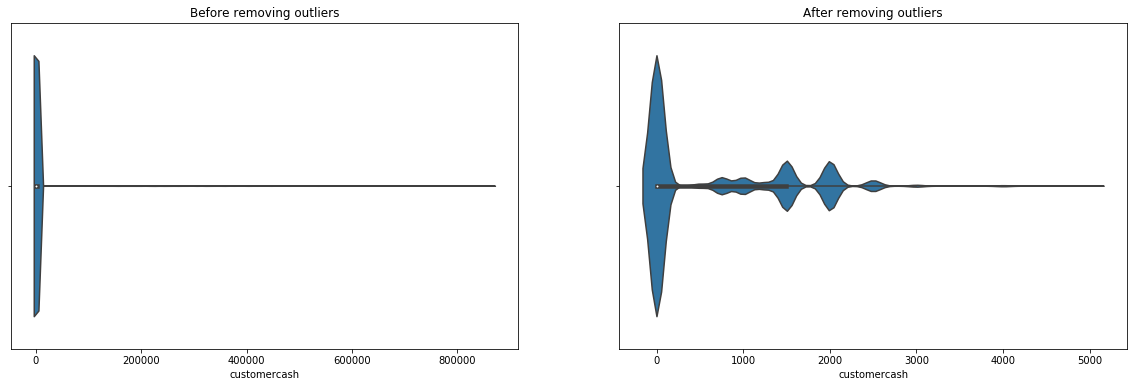

In [11]:
fig,ax = plt.subplots(1,2,figsize=(20,6))

sns.violinplot(x = car_Initial['customercash'], ax= ax[0])
ax[0].set_title('Before removing outliers')

sns.violinplot(x = customerCashLow['customercash'], ax= ax[1])
ax[1].set_title('After removing outliers')

## Looking at the relation between transaction MSRP and price

Text(0.5,1,'After removing outliers')

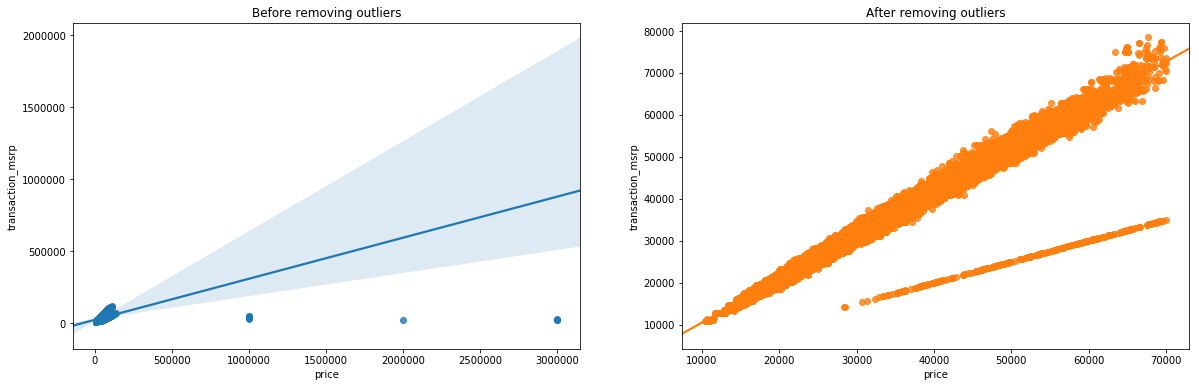

In [21]:
fig,ax = plt.subplots(1,2,figsize = (20,6))

sns.regplot(x=car_Initial['price'], y =car_Initial['transaction_msrp'], ax=ax[0])
ax[0].set_title('Before removing outliers')

sns.regplot(x=car_Modified['price'], y =car_Modified['transaction_msrp'], ax=ax[1])
ax[1].set_title('After removing outliers')

## Looking at the relation between base MSRP and price

Text(0.5,1,'After removing outliers')

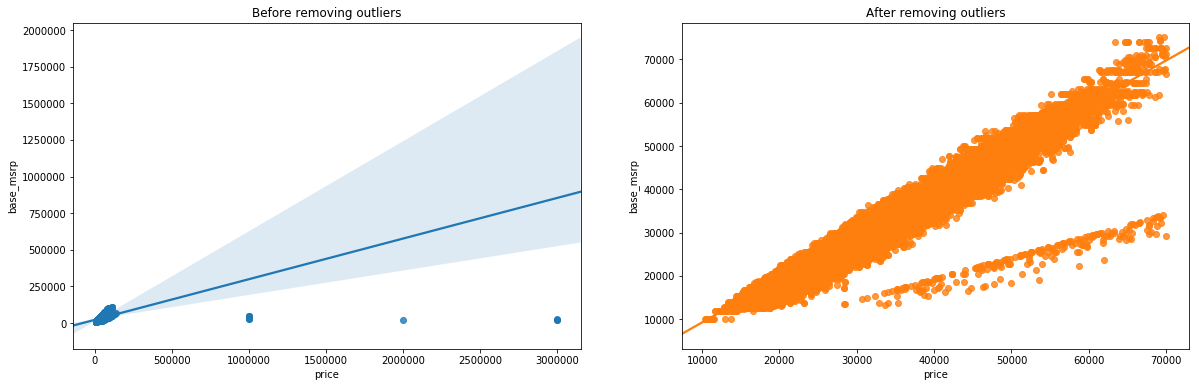

In [22]:
fig,ax = plt.subplots(1,2,figsize = (20,6))

sns.regplot(x=car_Initial['price'], y =car_Initial['base_msrp'], ax=ax[0])
ax[0].set_title('Before removing outliers')

sns.regplot(x=car_Modified['price'], y =car_Modified['base_msrp'], ax=ax[1])
ax[1].set_title('After removing outliers')

Text(0.5,1,'After removing outliers')

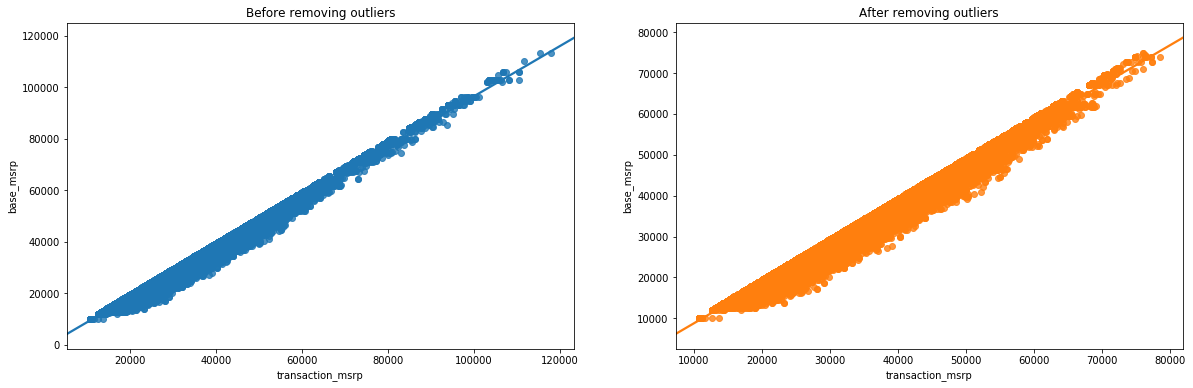

In [23]:
fig,ax = plt.subplots(1,2,figsize = (20,6))

sns.regplot(x=car_Initial['transaction_msrp'], y =car_Initial['base_msrp'], ax=ax[0])
ax[0].set_title('Before removing outliers')

sns.regplot(x=car_Modified['transaction_msrp'], y =car_Modified['base_msrp'], ax=ax[1])
ax[1].set_title('After removing outliers')

## The correlation has improved compared to the car_Initial data

In [24]:
car_Modified.corr()

,transaction_id,year,model_id,door,base_msrp,transaction_msrp,destination,zip,dealercash,customercash,finance,lease,cash,trim_id,make_id,longitude,latitude,price
transaction_id,1.000000,0.442961,0.421045,0.006706,-0.135283,-0.134833,-0.191695,-0.000020,0.057359,-0.018264,-0.006366,0.005915,0.001332,0.391777,-0.121345,-0.000361,-0.002935,-0.136753
year,0.442961,1.000000,0.894604,0.026633,-0.118209,-0.118902,-0.355570,-0.001403,-0.228962,-0.032838,-0.001601,0.004026,-0.003594,0.862053,-0.113317,0.001930,-0.000227,-0.123204
model_id,0.421045,0.894604,1.000000,0.030163,-0.086849,-0.087635,-0.297405,-0.000301,-0.331534,-0.030732,-0.001085,0.004060,-0.004497,0.963748,-0.123197,0.000030,0.000506,-0.096715
door,0.006706,0.026633,0.030163,1.000000,0.081967,0.079255,-0.142119,-0.001208,0.092336,0.002764,-0.003010,0.003736,-0.000824,0.015400,-0.090472,0.000346,0.002937,0.071765
base_msrp,-0.135283,-0.118209,-0.086849,0.081967,1.000000,0.990079,0.723109,0.001615,-0.341057,0.023844,-0.000911,0.000378,0.000915,-0.040843,0.687957,-0.002623,-0.003181,0.978892
transaction_msrp,-0.134833,-0.118902,-0.087635,0.079255,0.990079,1.000000,0.720052,0.001986,-0.337713,0.023115,-0.000750,0.000622,0.000274,-0.041775,0.682944,-0.002637,-0.003539,0.989656
destination,-0.191695,-0.355570,-0.297405,-0.142119,0.723109,0.720052,1.000000,-0.002390,-0.269419,0.029466,-0.000204,-0.001519,0.002687,-0.231160,0.635959,0.002333,-0.003156,0.716546
zip,-0.000020,-0.001403,-0.000301,-0.001208,0.001615,0.001986,-0.002390,1.000000,-0.001101,-0.002866,0.002113,0.001768,-0.006217,-0.000813,0.000925,-0.940655,-0.308782,0.003347
dealercash,0.057359,-0.228962,-0.331534,0.092336,-0.341057,-0.337713,-0.269419,-0.001101,1.000000,0.000381,-0.000923,-0.000727,0.002646,-0.418298,-0.249991,0.002426,0.000076,-0.342594
customercash,-0.018264,-0.032838,-0.030732,0.002764,0.023844,0.023115,0.029466,-0.002866,0.000381,1.000000,-0.003300,0.002826,0.001061,-0.026990,0.020944,0.002852,-0.001045,0.023267
